# Stock Market Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# Read in the data

In [2]:
path = 'E:\Data Science 12 Projects\data_stock_market\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
df = pd.DataFrame()
for company in company_list:
    current_df = pd.read_csv(path + '/' + company)
    df = pd.concat([df, current_df])

Info about the df:

In [3]:
df.head()
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 297.0+ KB


(4752, 7)

In [4]:
# check for missing values
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


## Analyse closing price of stock
## Analyse volume of stock being traded each day

In [6]:
tech_list = df['Name'].unique()

In [9]:
# check for the type of data
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [10]:
# convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
# check the data types again
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

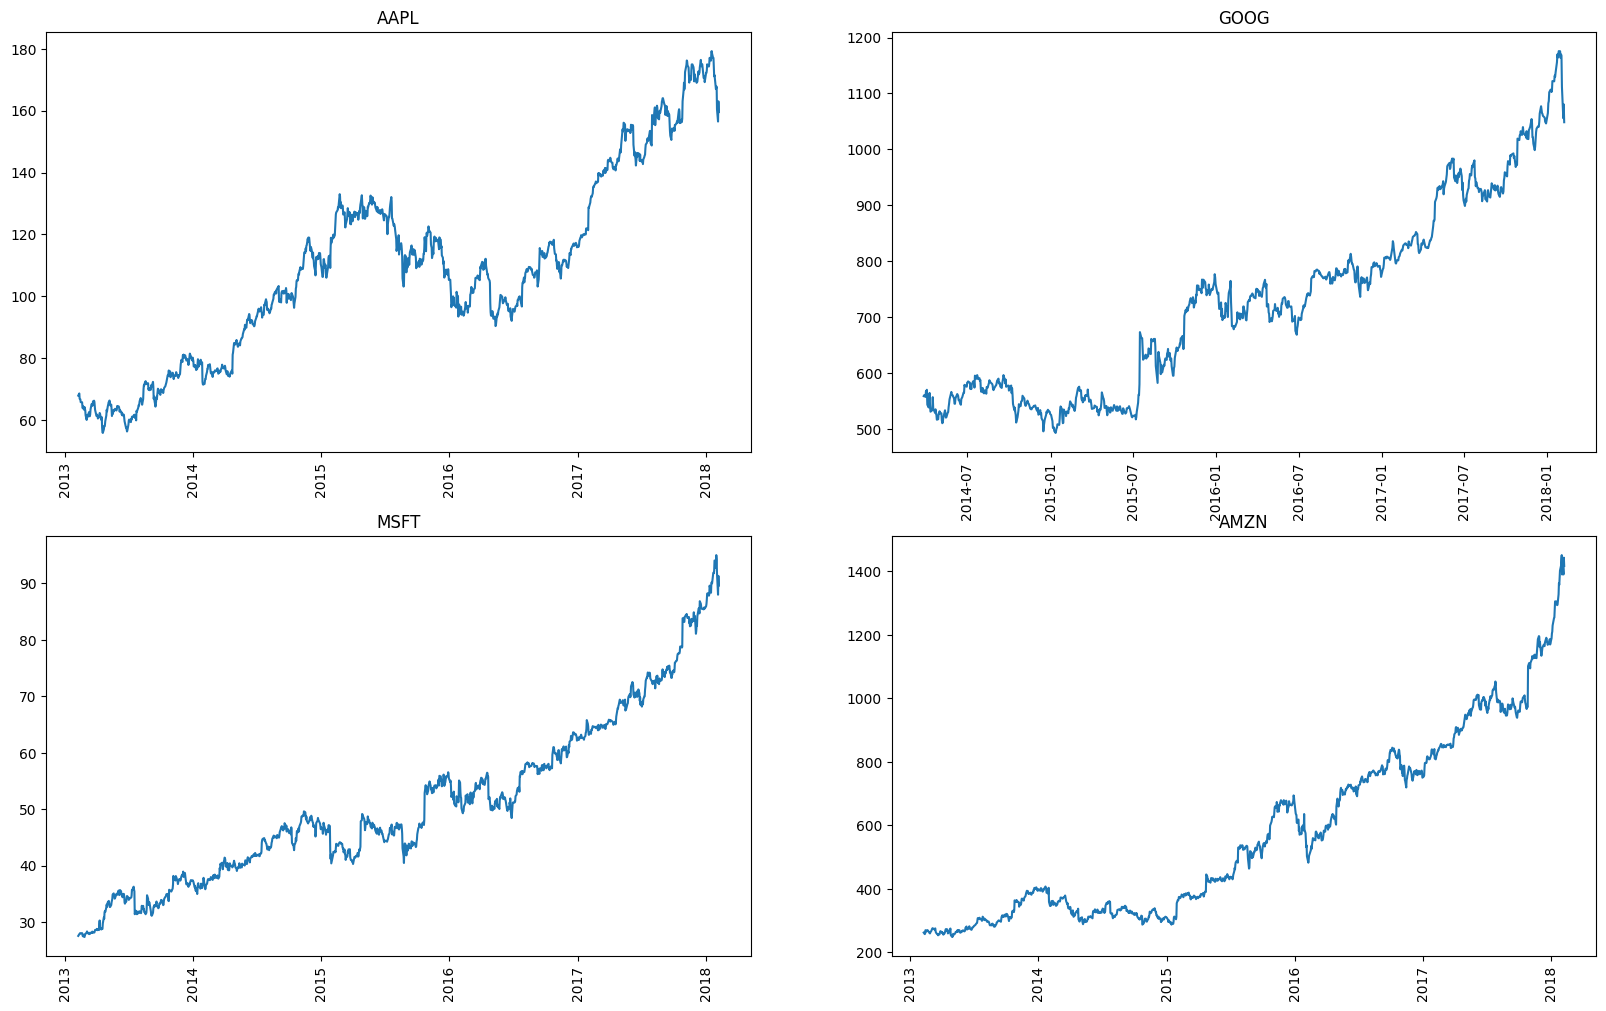

In [15]:
plt.figure(figsize=(20, 12))
for i, company in enumerate(tech_list, 1):
    # print(i, company)
    plt.subplot(2, 2, i)
    company_plot = df[df['Name'] == company]
    plt.plot(company_plot['date'], company_plot['close'])
    plt.xticks(rotation=90)
    plt.title(company)

In [16]:
import plotly.express as px

In [17]:
for company in tech_list:
    company_plot = df[df['Name'] == company]
    fig = px.line(company_plot, x='date', y='close', title=company)
    fig.show()

## Analyse daily price change of stock
## Analyse monthly mean of close feature

# Amazon Stock Market Analysis

In [20]:
pd_amazon = pd.read_csv('E:\Data Science 12 Projects\data_stock_market\individual_stocks_5yr\AAPL_data.csv')

In [21]:
pd_amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [22]:
# add a column for the Daily Price Change
pd_amazon['Daily Price Change'] = pd_amazon['close'] - pd_amazon['open']

In [24]:
# add a column for the Daily Price Change Percentage
pd_amazon['Daily Price Change Percentage'] = (pd_amazon['Daily Price Change'] / pd_amazon['open']) * 100

In [25]:
# add a column for the Daily return percentage
pd_amazon['Daily Return Percentage'] = (pd_amazon['Daily Price Change'] / pd_amazon['close']) * 100


In [26]:
pd_amazon.head()

,date,open,high,low,close,volume,Name,Daily Price Change,Daily Price Change Percentage,Daily Return Percentage
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206751,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.719832,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.421264,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042850,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.445600,0.443624


In [28]:
# plot the Daily Return Percentage
fig = px.line(pd_amazon, x='date', y='Daily Return Percentage', title=company)
fig.show()


In [29]:
# plot the Daily Price Change Percentage
fig = px.line(pd_amazon, x='date', y='Daily Price Change Percentage', title=company)
fig.show()

In [30]:
pd_amazon2 = pd_amazon.copy()

In [31]:
pd_amazon2.dtypes

date                              object
open                             float64
high                             float64
low                              float64
close                            float64
volume                             int64
Name                              object
Daily Price Change               float64
Daily Price Change Percentage    float64
Daily Return Percentage          float64
dtype: object

In [32]:
pd_amazon2['date'] = pd.to_datetime(pd_amazon2['date'])
pd_amazon2.dtypes

date                             datetime64[ns]
open                                    float64
high                                    float64
low                                     float64
close                                   float64
volume                                    int64
Name                                     object
Daily Price Change                      float64
Daily Price Change Percentage           float64
Daily Return Percentage                 float64
dtype: object

In [33]:
# set the date as the index
pd_amazon2.set_index('date', inplace=True)
pd_amazon2.head()

,open,high,low,close,volume,Name,Daily Price Change,Daily Price Change Percentage,Daily Return Percentage
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206751,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.719832,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.421264,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042850,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.445600,0.443624


In [34]:
# grab the range of dates we want to look at
pd_amazon2['2015-01-01':'2016-01-01']

,open,high,low,close,volume,Name,Daily Price Change,Daily Price Change Percentage,Daily Return Percentage
date,,,,,,,,,
2015-01-02,111.39,111.44,107.3500,109.33,53204626,AAPL,-2.06,-1.849358,-1.884204
2015-01-05,108.29,108.65,105.4100,106.25,64285491,AAPL,-2.04,-1.883830,-1.920000
2015-01-06,106.54,107.43,104.6300,106.26,65797116,AAPL,-0.28,-0.262812,-0.263505
2015-01-07,107.20,108.20,106.6950,107.75,40105934,AAPL,0.55,0.513060,0.510441
2015-01-08,109.23,112.15,108.7000,111.89,59364547,AAPL,2.66,2.435228,2.377335
...,...,...,...,...,...,...,...,...,...
2015-12-24,109.00,109.00,107.9500,108.03,13596680,AAPL,-0.97,-0.889908,-0.897899
2015-12-28,107.59,107.69,106.1807,106.82,26704210,AAPL,-0.77,-0.715680,-0.720839
2015-12-29,106.96,109.43,106.8600,108.74,30931243,AAPL,1.78,1.664174,1.636932


In [36]:
# monthly average closing price
pd_amazon2['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot: xlabel='date'>

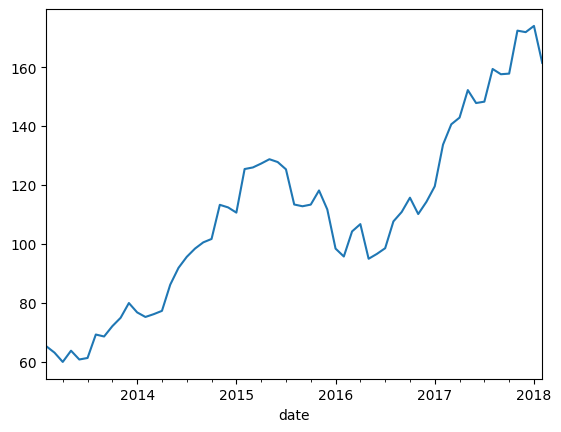

In [37]:
# plot the monthly average closing price
pd_amazon2['close'].resample('M').mean().plot()

<AxesSubplot: xlabel='date'>

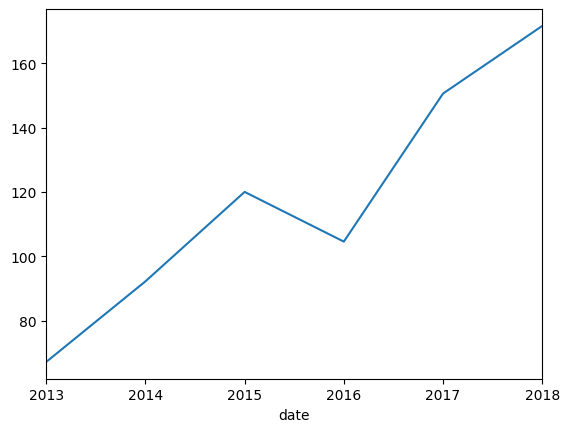

In [39]:
# plot the year average closing price
pd_amazon2['close'].resample('Y').mean().plot()

<AxesSubplot: ylabel='date'>

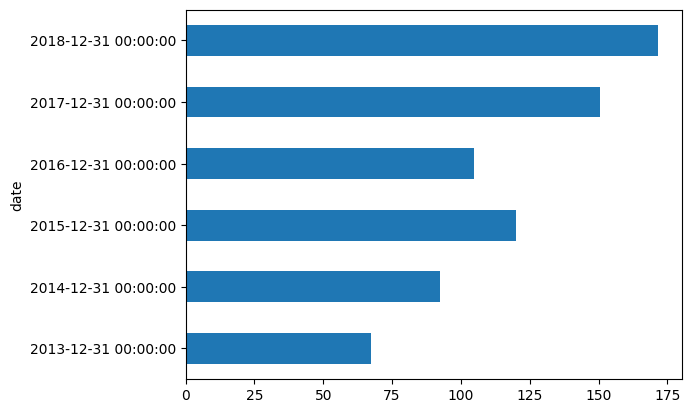

In [44]:
pd_amazon2['close'].resample('Y').mean().plot(kind='barh')


## Analyse whether stock prices of these companies are correlated
## Analyse daily return of each stock and how they are correlated
## Value at Risk Analysis for Tech Companies

In [46]:
# read amazon data
path = 'E:\Data Science 12 Projects\data_stock_market\individual_stocks_5yr'
appl = pd.read_csv(path + '/' + 'AAPL_data.csv')
appl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [47]:
# read amazon data
amzn = pd.read_csv(path + '/' + 'AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [48]:
# read Microsft data
msft = pd.read_csv(path + '/' + 'MSFT_data.csv')
msft.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [49]:
# read Google data
goog = pd.read_csv(path + '/' + 'GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [50]:
# create a new dataframe with the closing prices of each company
closing_df = pd.DataFrame()
closing_df['AAPL'] = appl['close']
closing_df['AMZN'] = amzn['close']
closing_df['MSFT'] = msft['close']
closing_df['GOOG'] = goog['close']

In [51]:
closing_df.head()

,AAPL,AMZN,MSFT,GOOG
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


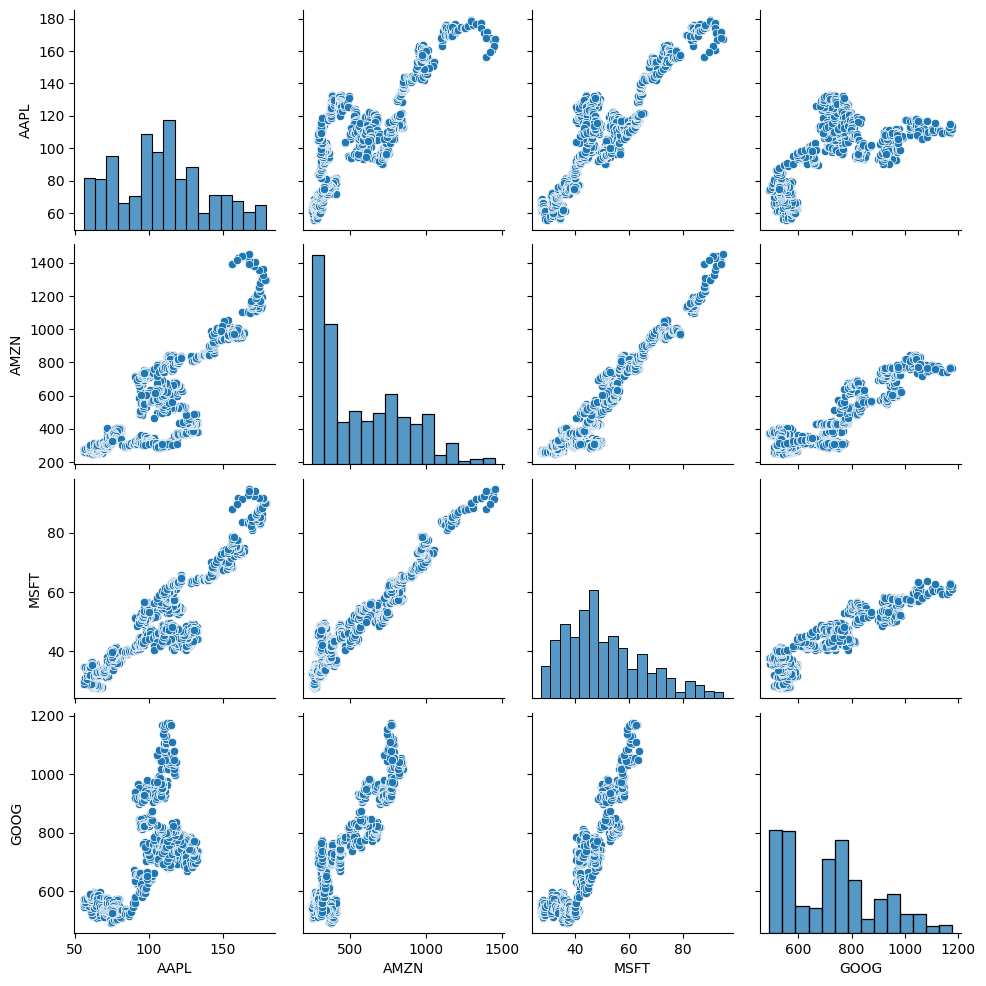

In [52]:
#  plot with seaborn
sns.pairplot(closing_df)

In [53]:
# find the coorelation between the closing prices
closing_df.corr()

,AAPL,AMZN,MSFT,GOOG
AAPL,1.000000,0.819078,0.899689,0.640522
AMZN,0.819078,1.000000,0.955977,0.888456
MSFT,0.899689,0.955977,1.000000,0.907011
GOOG,0.640522,0.888456,0.907011,1.000000


<AxesSubplot: >

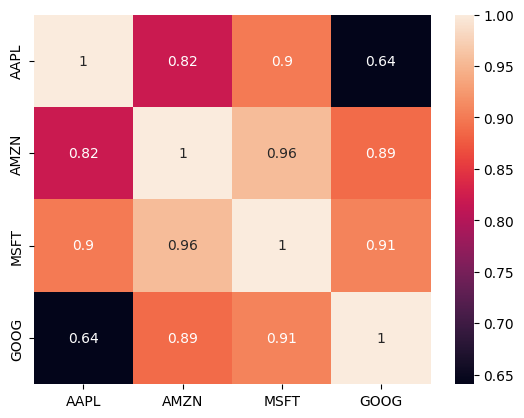

In [54]:
# use the heatmap to visualize the correlation
sns.heatmap(closing_df.corr(), annot=True)


# Analyse daily return of each stock and how they are correlated

In [55]:
new_df = pd.DataFrame()


In [56]:
new_df['AAPL_CHANGE'] = ((appl['close'] - appl['open']) / appl['close']) * 100
new_df['AMZN_CHANGE'] = ((amzn['close'] - amzn['open']) / amzn['close']) * 100
new_df['MSFT_CHANGE'] = ((msft['close'] - msft['open']) / msft['close']) * 100
new_df['GOOG_CHANGE'] = ((goog['close'] - goog['open']) / goog['close']) * 100

In [57]:
new_df.head()

,AAPL_CHANGE,AMZN_CHANGE,MSFT_CHANGE,GOOG_CHANGE
0,0.206325,0.209964,0.725953,-1.708269
1,0.714688,-2.328836,0.753769,-0.216075
2,-2.481344,-0.189409,0.000000,-1.781065
3,-0.042869,2.946525,0.356761,1.489879
4,0.443624,0.694548,0.427960,0.334039


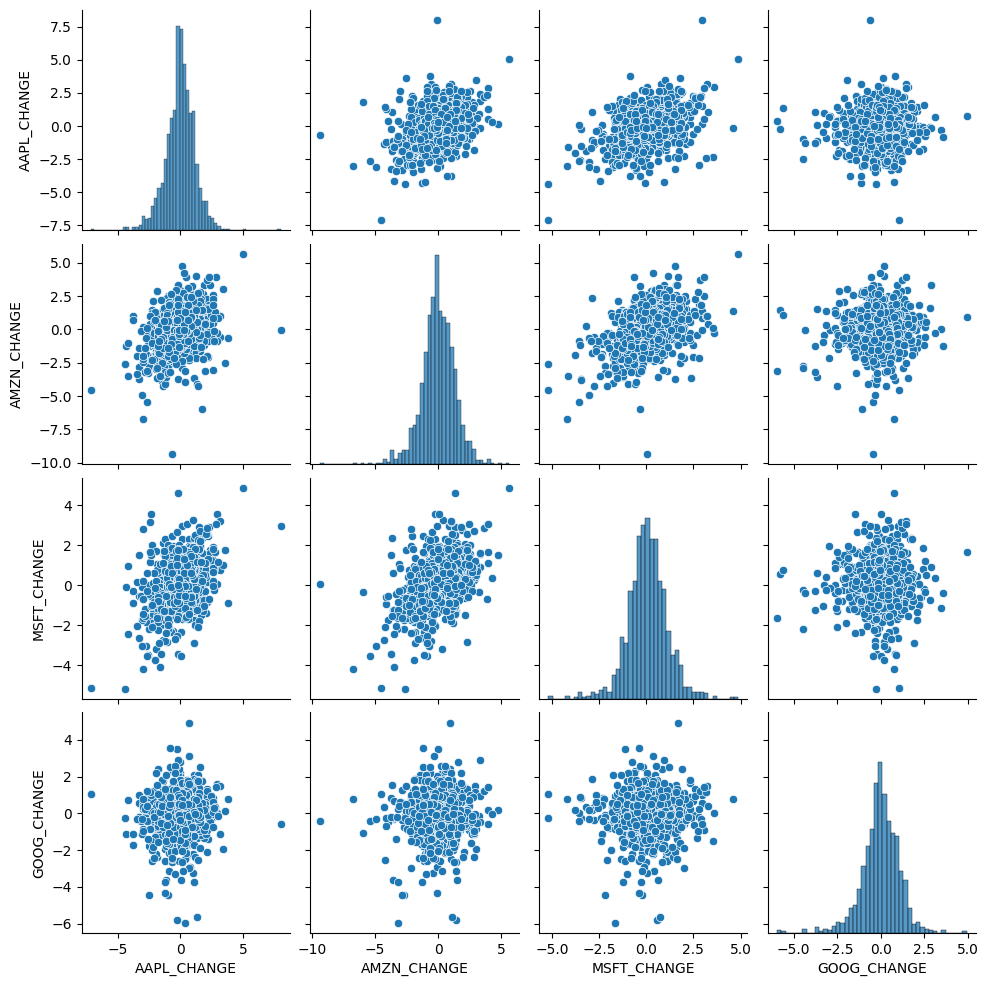

In [58]:
sns.pairplot(new_df)

<AxesSubplot: >

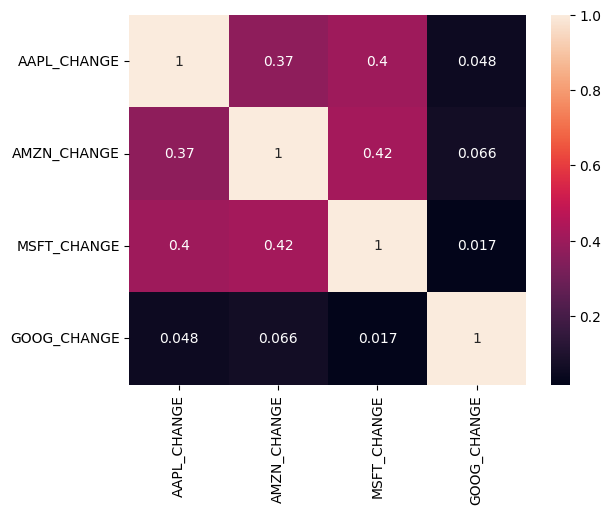

In [59]:
sns.heatmap(new_df.corr(), annot=True)

# Value at Risk Analysis for Tech Companies

C:\Users\rober\AppData\Local\Temp\ipykernel_18096\1995523276.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='AAPL_CHANGE', ylabel='Density'>

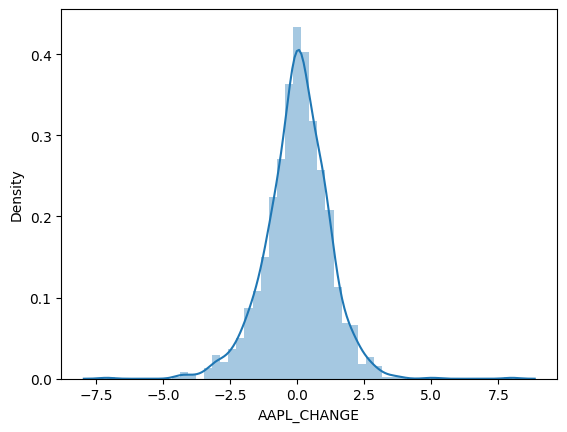

In [60]:
sns.distplot(new_df['AAPL_CHANGE'])

In [61]:
# standar deviation
new_df.std()

AAPL_CHANGE    1.187138
AMZN_CHANGE    1.358679
MSFT_CHANGE    1.059260
GOOG_CHANGE    1.092560
dtype: float64

In [62]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL_CHANGE,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
AMZN_CHANGE,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
MSFT_CHANGE,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
GOOG_CHANGE,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
